In [1]:
from IPython.display import display, HTML

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib as mlp
import matplotlib.pyplot as plt
import geopandas as gp

import os

os.chdir("../../../core")
import GT_helper_functions as hf
import GT_load_data as data

base_dir = "../../Outcome Measurement Data/"

In [2]:
%matplotlib inline
plt.style.use('ggplot')
sb.set_style("whitegrid")
plt.rcParams["ytick.labelsize"] = 13
plt.rcParams["axes.labelsize"] = 15
plt.rcParams["axes.titlesize"] = 15
plt.rcParams["xtick.labelsize"] = 15
plt.rcParams["grid.linewidth"] = 2.0
plt.rcParams["axes.edgecolor"] = "0.15"
plt.rcParams["axes.linewidth"]  = 1.1
plt.rcParams["legend.frameon"] = True
plt.rcParams["legend.framealpha"]= 0.9
plt.rcParams["legend.edgecolor"] = "black"
plt.rcParams["legend.fontsize"] = 16
plt.rcParams["figure.titlesize"] = 18
plt.rcParams["figure.dpi"] = 150
plt.rcParams["figure.autolayout"] = False
pd.options.display.max_columns = 100
pd.options.display.max_seq_items = 200

In [3]:
priordepts2014 = [1, 5, 12, 10, 9, 11, 18, 19 ]
priordepts2018 = [10, 11, 12, 14, 9, 13, 16, 18, 1, 5, 17]
labs2018 = [17, 16,18,19,1,13,12,9,11,10,5]
labs2016 = [1, 9, 12, 10, 18, 5, 11]

In [4]:
tbquimio = pd.read_csv(base_dir + "TUBERCULOSIS/Notificaciones TB/GTM - TB quimio 2012-Jun2018.csv", 
                     encoding="latin-1", index_col = 0, low_memory = False)

In [5]:
#tbquimio[tbquimio.FECHAINICIOTX!="ND"].YearMonth.value_counts().sort_index()

In [6]:
tbquimio["lte5yo"] = tbquimio.EDAD <= 5
tbquimio["_sem"] = tbquimio.YEAR.astype(str)+(tbquimio.YearMonth%100<7).map(lambda x: " - 1st Sem" if x else " - 2nd Sem")
ts = tbquimio.groupby(["_sem", 
                       "lte5yo"]).apply(len).unstack()
ts = ts[ts.index != "2018 - 2nd Sem"]

In [7]:
ts.columns = ["> 5 years old", "≤ 5 years old"]

0

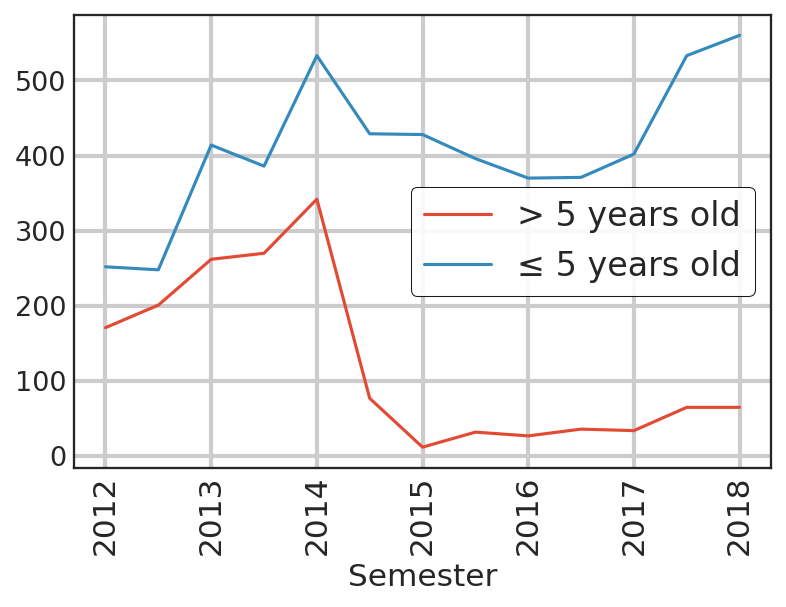

In [8]:
ts.plot()
plt.xlabel("Semester")
plt.xticks([0,2, 4, 6, 8, 10,12], [2012, 2013,2014,2015,2016,2017,2018], rotation=90)
0

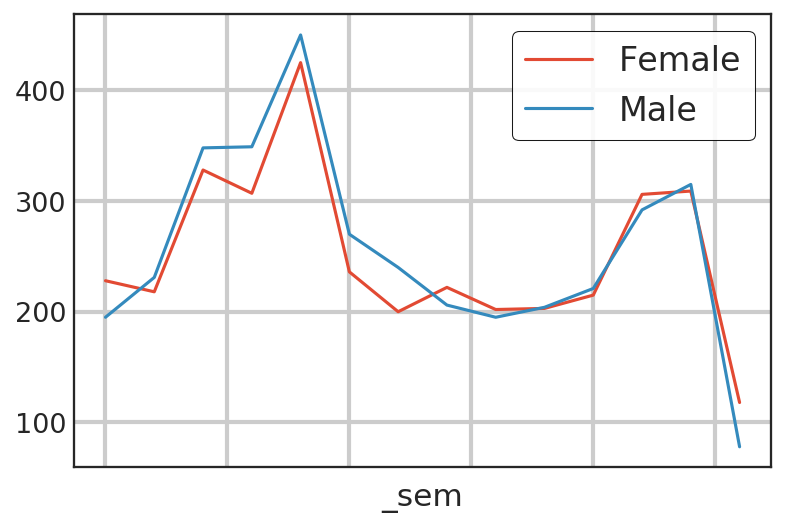

In [48]:
ts = tbquimio.groupby(["_sem", "SEXO"]).apply(len).unstack()
ts.columns = ["Female", "Male"]
ts.plot()

0

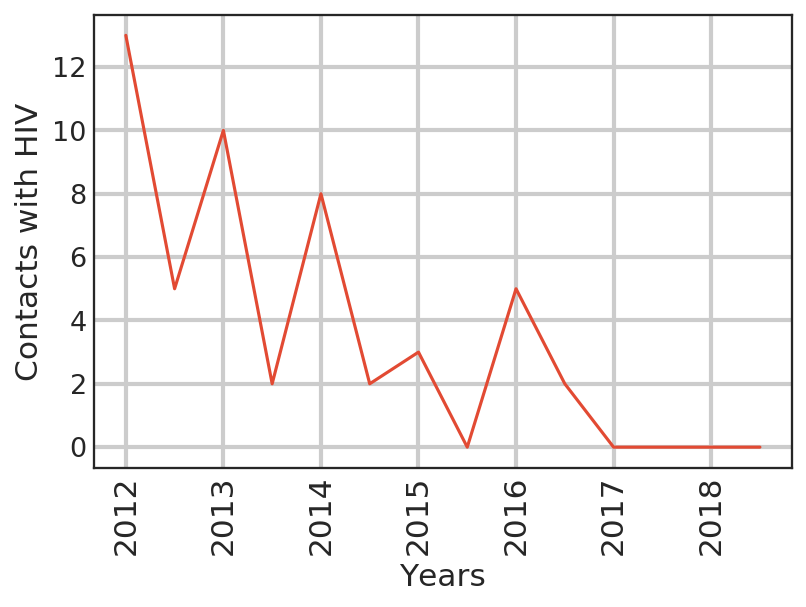

In [75]:
ts = tbquimio[tbquimio.VIH=="Reactive"].groupby(["_sem"]).apply(len)
ts.reindex(tbquimio._sem.unique(), fill_value=0).plot()
plt.xlabel("Years")
plt.ylabel("Contacts with HIV")
plt.xticks([0,2, 4, 6, 8, 10,12], [2012, 2013,2014,2015,2016,2017,2018], rotation=90)
0

In [17]:
tbnots = pd.read_csv(base_dir + "TUBERCULOSIS/Notificaciones TB/GTM - TB notifications 2012-Jun2018.csv", 
                     encoding="latin-1", index_col = 0, low_memory = False)

In [21]:
tbnots.groupby(["SEXO", "YEAR"]).SEXO.count().unstack(0).apply(lambda x: x.m / x.f , 1 )

YEAR
2012    1.227873
2013    1.261549
2014    1.358034
2015    1.342305
2016    1.391273
2017    1.344208
2018    1.351598
dtype: float64